# **Importacion De Librerias y Datos**

In [2]:
import warnings
warnings.filterwarnings("ignore")

# **Analisis Exploratorio De Datos (EDA)**

In [ ]:
# Definir los tipos de dato para el dataset de prestadores
dtypes_prestadores = {
    'Geogra_Municipio_Id': 'category',
    'max_cantidad': 'float64'
}

# Seleccionar solo las columnas relevantes para df_prestadores
cols_to_use_prestadores = ['Geogra_Municipio_Id', 'max_cantidad']

# Leer el archivo CSV de df_prestadores
df_prestadores = pd.read_excel(
    "/kaggle/input/data-sura/2.Red Prestadores.xlsx",
    usecols=cols_to_use_prestadores,
    dtype=dtypes_prestadores
)

In [ ]:
# Vista previa de cada dataset
df_salud = df.copy()
print("DF Salud:")
display(df_salud.head())
print("dtypes:")
print(df_salud.dtypes)


print("DF Prestadores:")
display(df_prestadores.head())
print("dtypes:")
print(df_prestadores.dtypes)

In [ ]:
# Información general de los DataFrame
print("Información de df_salud:")
df_salud.info()

print("Informacion de Prestadores")
df_prestadores.info()

# Estadísticas descriptivas (numéricas y algunas categóricas)
print("Estadísticas descriptivas de df_salud:")
display(df_salud.describe(include='all'))

print("Estadísticas descriptivas de df_salud:")
display(df_prestadores.describe(include='all'))

**Analisis de Valores Nulos Y Duplicados**

In [ ]:
# Valores nulos
print("Valores nulos de datos de Salud")
df_salud.isnull().sum()
print("Valores nulos de datos de Prestadores")
df_prestadores.isnull().sum

In [ ]:
print("Duplicados de datos de Salud")
df_salud.duplicated()
print("DUplicados de datos de Prestadores")
df_prestadores.duplicated()

In [ ]:
# Estadísticas de capacidad máxima
display(df_prestadores["max_cantidad"].describe())

**Tipos de Atencion Medica mas Comunes**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifica las 10 etiquetas más comunes
top10 = df_salud["Concepto_Factura_Desc"].value_counts().nlargest(10).index

# Filtra el DataFrame para quedarte sólo con esas 10
df_top10 = df_salud[df_salud["Concepto_Factura_Desc"].isin(top10)]

# Grafica de barras
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_top10,
    y="Concepto_Factura_Desc",
    order=top10
)
plt.title("Top 10 Tipos de Atención Médica")
plt.xlabel("Número de facturas")
plt.ylabel("Concepto de Factura")
plt.tight_layout()
plt.show()

In [ ]:
# Asegurarse de que FECHA_ATENCION es datetime
df_salud['Mes'] = df_salud['FECHA_ATENCION'].dt.to_period('M')

# Agrupar la demanda (Cantidad) por mes
demanda_por_mes = df_salud.groupby('Mes')['Cantidad'].sum().sort_index()

plt.figure(figsize=(18,6))
demanda_por_mes.plot(marker='o')
plt.title("Demanda Mensual Total")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Agrupar y sumar las cantidades por municipio
demanda_municipio = (
    df_salud
    .groupby("MUNICIPIO", observed=True)["Cantidad"]
    .sum()
    .reset_index()
)

# Obtener los 10 municipios con mayor demanda
top10 = demanda_municipio.nlargest(10, "Cantidad")

# Ordenar los valores para el gráfico (opcional, dependiendo de la preferencia)
top10 = top10.sort_values("Cantidad", ascending=True)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x="Cantidad",
    y="MUNICIPIO",
    order=top10["MUNICIPIO"]  # Asegura el orden correcto
)
plt.title("Municipios con Mayor Demanda de Servicios")
plt.tight_layout()  # Mejora el espacio del gráfico
plt.show()

**Tendencias por tipo de servicio médico**

In [ ]:
# Asegurarse de que FECHA_ATENCION es datetime
df_salud['Mes'] = df_salud['FECHA_ATENCION'].dt.to_period('M')

# Agrupar por mes y tipo de atención
tendencia_por_tipo = df_salud.groupby(['Mes', 'Concepto_Factura_Desc'])['Cantidad'].sum().reset_index()

# Obtener los 10 tipos de atención más comunes para simplificar la visualización
top_tipos = df_salud['Concepto_Factura_Desc'].value_counts().nlargest(10).index

# Filtrar solo los tipos top
tendencia_por_tipo_top = tendencia_por_tipo[tendencia_por_tipo['Concepto_Factura_Desc'].isin(top_tipos)]

# Convertir Mes a string para mejor visualización
tendencia_por_tipo_top['Mes'] = tendencia_por_tipo_top['Mes'].astype(str)

# Crear gráfico de líneas
plt.figure(figsize=(16, 8))
for tipo in top_tipos:
    data = tendencia_por_tipo_top[tendencia_por_tipo_top['Concepto_Factura_Desc'] == tipo]
    plt.plot(data['Mes'], data['Cantidad'], marker='o', label=tipo)

plt.title('Tendencia de Demanda por Tipo de Servicio Médico')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Análisis específico por municipio**

In [ ]:
# Agrupar datos por municipio
datos_por_municipio = df_salud.groupby('MUNICIPIO').agg({
    'Cantidad': 'sum',
    'FECHA_ATENCION': 'count',
    'Concepto_Factura_Desc': lambda x: x.nunique(),
}).reset_index()

# Renombrar columnas
datos_por_municipio.columns = ['Municipio', 'Total_Demanda', 'Num_Atenciones', 'Tipos_Servicio']

# Calcular promedio de demanda por atención
datos_por_municipio['Demanda_Promedio'] = datos_por_municipio['Total_Demanda'] / datos_por_municipio['Num_Atenciones']

# Visualizar estadísticas por municipio (todos los municipios)
print("Estadísticas por municipio:")
display(datos_por_municipio.sort_values('Total_Demanda', ascending=False))

# Analizar más a fondo los 10 municipios principales
top10_municipios = datos_por_municipio.nlargest(10, 'Total_Demanda')['Municipio'].tolist()

# Para cada municipio top, analizar la tendencia mensual
plt.figure(figsize=(15, 10))

for i, municipio in enumerate(top10_municipios):
    # Filtrar datos del municipio
    df_muni = df_salud[df_salud['MUNICIPIO'] == municipio]
    
    # Agrupar por mes
    df_muni_mes = df_muni.groupby(df_muni['FECHA_ATENCION'].dt.to_period('M'))['Cantidad'].sum()
    
    # Crear subgráfico
    plt.subplot(5, 2, i+1)
    df_muni_mes.plot()
    plt.title(f'Tendencia mensual: {municipio}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Patrones estacionales**

In [ ]:
!pip install statsmodels

In [ ]:
# Crear variables para diferentes medidas temporales
df_salud['Año'] = df_salud['FECHA_ATENCION'].dt.year
df_salud['Mes'] = df_salud['FECHA_ATENCION'].dt.month
df_salud['DiaSemana'] = df_salud['FECHA_ATENCION'].dt.dayofweek  # 0=Lunes, 6=Domingo
df_salud['DiaMes'] = df_salud['FECHA_ATENCION'].dt.day
df_salud['Trimestre'] = df_salud['FECHA_ATENCION'].dt.quarter

# 1. Análisis por mes del año
demanda_por_mes = df_salud.groupby('Mes')['Cantidad'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Cantidad', data=demanda_por_mes)
plt.title('Demanda por Mes del Año')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Análisis por día de la semana
demanda_por_dia = df_salud.groupby('DiaSemana')['Cantidad'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DiaSemana', y='Cantidad', data=demanda_por_dia)
plt.title('Demanda por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad')
plt.xticks(range(7), ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.show()

# Análisis por trimestre
demanda_por_trimestre = df_salud.groupby(['Año', 'Trimestre'])['Cantidad'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre', y='Cantidad', hue='Año', data=demanda_por_trimestre, marker='o')
plt.title('Demanda Trimestral por Año')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()


# Análisis de estacionalidad 
from statsmodels.tsa.seasonal import seasonal_decompose

# Preparar serie temporal para decomposición
ts_data = df_salud.groupby(df_salud['FECHA_ATENCION'].dt.to_period('M'))['Cantidad'].sum()
ts_data.index = pd.to_datetime(ts_data.index.astype(str))

# Realizar descomposición estacional (si hay suficientes datos)
if len(ts_data) >= 24:  # Necesitamos al menos 2 años de datos
    decomposition = seasonal_decompose(ts_data, model='additive', period=12)
    
    # Graficar la descomposición
    plt.figure(figsize=(12, 10))
    plt.subplot(411)
    plt.plot(ts_data, label='Original')
    plt.legend(loc='best')
    plt.title('Descomposición Estacional')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendencia')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Estacionalidad')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuos')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

**Detección de valores atípicos, datos faltantes y errores**

In [ ]:
# Análisis de valores faltantes
print("Total de valores faltantes por columna:")
print(df_salud.isnull().sum())

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_salud.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.show()

# Detección de valores atípicos en la variable "Cantidad"
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_salud['Cantidad'])
plt.title('Distribución de la Variable Cantidad')
plt.ylabel('Cantidad')
plt.show()

# Cálculo de percentiles para identificar outliers
Q1 = df_salud['Cantidad'].quantile(0.25)
Q3 = df_salud['Cantidad'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Valores atípicos - Límite inferior: {lower_bound}, Límite superior: {upper_bound}")
print(f"Número de outliers: {df_salud[(df_salud['Cantidad'] < lower_bound) | (df_salud['Cantidad'] > upper_bound)].shape[0]}")

# Análisis de valores inconsistentes
# Verificar si hay cantidades negativas o cero (que podrían ser erróneas)
print(f"Registros con cantidad negativa: {df_salud[df_salud['Cantidad'] < 0].shape[0]}")
print(f"Registros con cantidad cero: {df_salud[df_salud['Cantidad'] == 0].shape[0]}")

# Verificación de fechas
min_date = df_salud['FECHA_ATENCION'].min()
max_date = df_salud['FECHA_ATENCION'].max()
print(f"Rango de fechas: {min_date} a {max_date}")

# Comprobar si hay fechas futuras (posteriores a la fecha actual)
future_dates = df_salud[df_salud['FECHA_ATENCION'] > pd.Timestamp.now()]
print(f"Registros con fechas futuras: {future_dates.shape[0]}")

# Verificar duplicados exactos
duplicados = df_salud.duplicated()
print(f"Número de registros duplicados: {duplicados.sum()}")

# Comprobar problemas potenciales en los valores categóricos
for col in ['Concepto_Factura_Desc', 'MUNICIPIO']:
    n_values = df_salud[col].nunique()
    print(f"Columna {col}: {n_values} valores únicos")
    
    # Si hay muchos valores únicos, puede haber inconsistencias
    if n_values > 100:  # Umbral arbitrario
        print("  ⚠️ Esta columna tiene muchos valores únicos, posible inconsistencia en nomenclatura")
        
        # Mostrar los valores más y menos frecuentes
        print("  Valores más comunes:")
        print(df_salud[col].value_counts().head())
        print("  Valores menos comunes:")
        print(df_salud[col].value_counts().tail())

# Análisis de la capacidad máxima del prestador vs. demanda real
if 'Geogra_Municipio_Id' in df_salud.columns and 'Geogra_Municipio_Id' in df_prestadores.columns:
    # Agrupar demanda por municipio
    demanda_municipio = df_salud.groupby('Geogra_Municipio_Id')['Cantidad'].sum().reset_index()
    
    # Combinar con información de capacidad
    analisis_capacidad = demanda_municipio.merge(df_prestadores, on='Geogra_Municipio_Id', how='inner')
    analisis_capacidad['Porcentaje_Uso'] = (analisis_capacidad['Cantidad'] / analisis_capacidad['max_cantidad']) * 100
    
    # Identificar posibles problemas
    print("Municipios con posible sobrecarga (uso > 90%):")
    display(analisis_capacidad[analisis_capacidad['Porcentaje_Uso'] > 90])
    
    print("Municipios con baja utilización (uso < 20%):")
    display(analisis_capacidad[analisis_capacidad['Porcentaje_Uso'] < 20])

**Análisis de series temporales específico**

In [ ]:
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm

# Preparar serie temporal diaria
ts_diaria = df_salud.groupby(df_salud['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
ts_diaria.index = pd.to_datetime(ts_diaria.index)

# Visualizar la serie temporal completa
plt.figure(figsize=(15, 7))
plt.plot(ts_diaria)
plt.title('Serie Temporal Diaria de Demanda')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analizar la estacionariedad de la serie
result = adfuller(ts_diaria.dropna())
print('Prueba de Dickey-Fuller Aumentada:')
print(f'Estadística de prueba: {result[0]}')
print(f'Valor p: {result[1]}')
print(f'Valores críticos: {result[4]}')
if result[1] <= 0.05:
    print("La serie es estacionaria (rechazamos H0)")
else:
    print("La serie no es estacionaria (no rechazamos H0)")

# Analizar autocorrelación
plt.figure(figsize=(12, 10))

# ACF
plt.subplot(211)
sm.graphics.tsa.plot_acf(ts_diaria.dropna(), lags=40, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(212)
sm.graphics.tsa.plot_pacf(ts_diaria.dropna(), lags=40, ax=plt.gca())
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

# Descomposición de la serie temporal (tendencia, estacionalidad, residuos)
# Usar la serie semanal para reducir el ruido
ts_semanal = df_salud.groupby(pd.Grouper(key='FECHA_ATENCION', freq='W'))['Cantidad'].sum()

# Realizar descomposición
descomposicion = sm.tsa.seasonal_decompose(ts_semanal, model='additive', period=52)

# Graficar
fig = descomposicion.plot()
fig.set_size_inches(15, 12)
plt.tight_layout()
plt.show()

# Análisis de venta móvil para detectar tendencias a largo plazo
ventanas = [7, 30, 90, 180]
plt.figure(figsize=(15, 8))

plt.plot(ts_diaria, alpha=0.5, label='Original')

for ventana in ventanas:
    ts_ma = ts_diaria.rolling(window=ventana).mean()
    plt.plot(ts_ma, label=f'Media Móvil ({ventana} días)')

plt.title('Análisis de Tendencia con Medias Móviles')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **PIPELINE**

GPUs detectadas: 2
Procesando 20 combos
Mejores parámetros: {'epochs': 20, 'stacks': 2, 'units': 256}
Métricas promedio: {'RMSE': 27.89779743381296, 'MAE': 19.474267589478345, 'SMAPE': 63.080024727993376, 'MASE': 0.538972380015579, 'model': 'NBeats'}


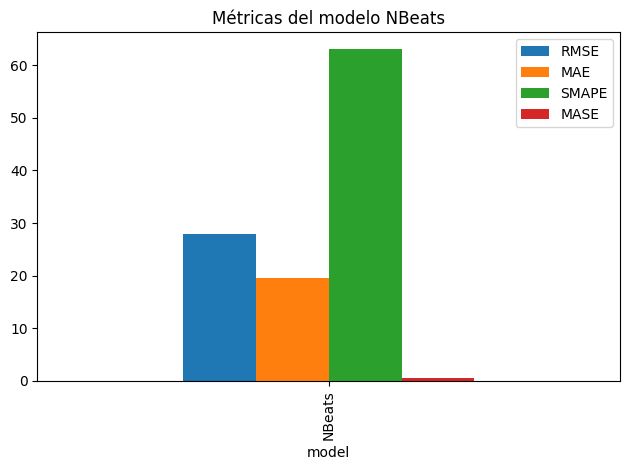

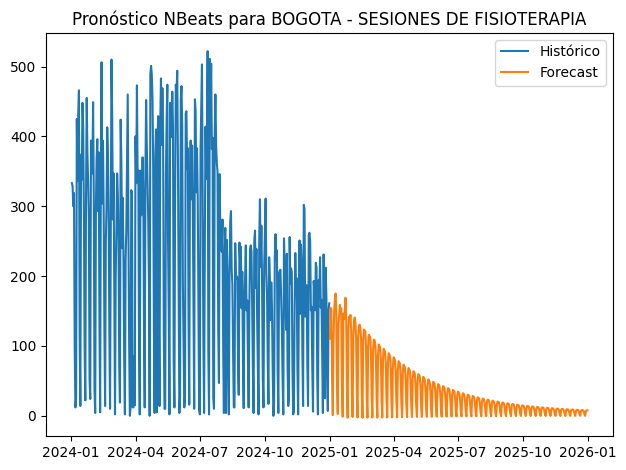

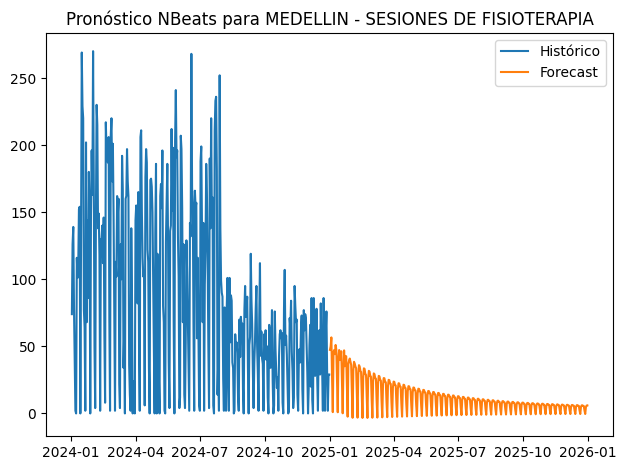

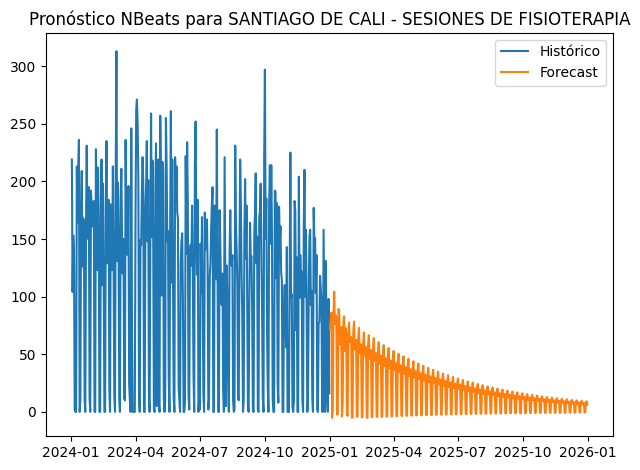

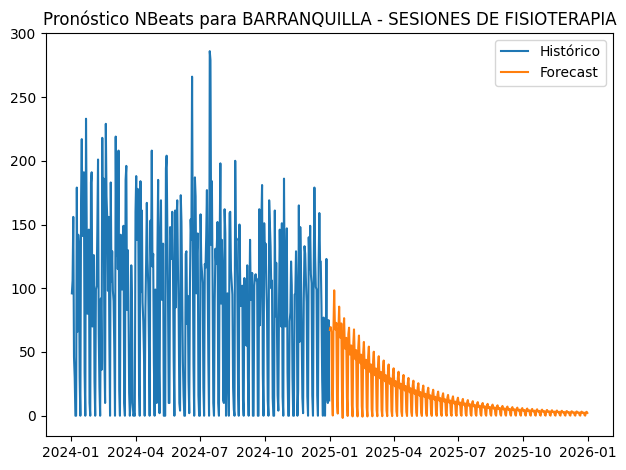

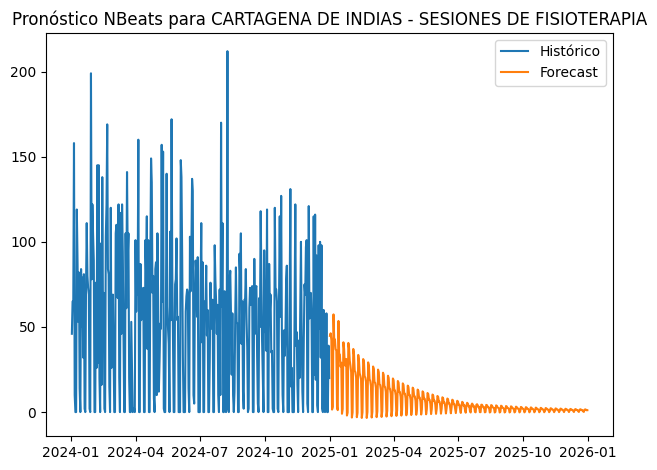

Pipeline completado - NBeats sin función main.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error
import holidays

# ------------------------- Configuración -------------------------------
GPUS = tf.config.list_physical_devices('GPU')
if GPUS:
    for g in GPUS:
        tf.config.experimental.set_memory_growth(g, True)
    print(f"GPUs detectadas: {len(GPUS)}")
else:
    print("Usando CPU")

WINDOW = 30
TOP_N = 10
TOP_M = 2
CV_SPLITS = 5
HORIZON = 365  # días a predecir

# ------------------------- Métricas extendidas ---------------------------
def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denom != 0
    return 100 * np.mean(np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def mase(y_true, y_pred, y_insample, season=1):
    mae_model = mean_absolute_error(y_true, y_pred)
    diff = np.abs(y_insample[season:] - y_insample[:-season])
    mae_naive = diff.mean()
    return mae_model / mae_naive if mae_naive != 0 else np.nan

# ------------------------- Data Prep ---------------------------------------
def load_data(path):
    df = pd.read_csv(path, sep='|', usecols=['FECHA_ATENCION','Concepto_Factura_Desc','Cantidad','MUNICIPIO'],
                     parse_dates=['FECHA_ATENCION'])
    df.drop_duplicates(inplace=True)
    df = df[df['Cantidad'].notna()]
    df['MUNICIPIO'] = df['MUNICIPIO'].str.split('-').str[0].str.strip()
    return df

# Exógenas
def make_exog(idx):
    cal = holidays.Colombia()
    df_ex = pd.DataFrame(index=idx)
    df_ex['is_weekend'] = (idx.dayofweek >= 5).astype(int)
    df_ex['is_holiday'] = idx.to_series().apply(lambda d: 1 if d in cal else 0)
    df_ex['covid'] = idx.to_series().apply(lambda d: 1 if (d.year==2020 and d.month>=3) or d.year==2021 else 0)
    return df_ex

# Serie diaria univariante
def get_ts(df, muni, serv):
    ts = df[(df['MUNICIPIO']==muni)&(df['Concepto_Factura_Desc']==serv)]
    ts = ts.set_index('FECHA_ATENCION')['Cantidad']
    ts = ts.resample('D').sum().asfreq('D').fillna(0)
    return ts

# Secuencias para DL
def make_seq(vals, w):
    X, y = [], []
    for i in range(len(vals) - w): X.append(vals[i:i+w]); y.append(vals[i+w])
    return np.array(X), np.array(y)

# ------------------------- Train/Evaluate CV -------------------------------
def train_evaluate(ts, params):
    tscv = TimeSeriesSplit(n_splits=CV_SPLITS)
    scores = []
    y_insample = ts.values
    for tr, te in tscv.split(ts):
        t_tr, t_te = ts.iloc[tr], ts.iloc[te]
        if len(t_tr) < WINDOW + 1 or len(t_te) == 0: continue

        # NBeats
        Xtr, Ytr = make_seq(t_tr.values, WINDOW)
        Xte, _ = make_seq(np.concatenate([t_tr.values[-WINDOW:], t_te.values]), WINDOW)
        class Block(layers.Layer):
            def __init__(self):
                super().__init__()
                self.hidden = [layers.Dense(params['units'], activation='relu') for _ in range(4)]
                self.backcast = layers.Dense(WINDOW)
                self.forecast = layers.Dense(1)
            def call(self, x):
                h = x
                for lyr in self.hidden: h = lyr(h)
                return self.backcast(h), self.forecast(h)
        inp = layers.Input(shape=(WINDOW,)); res = inp; fc = 0
        for _ in range(params['stacks']): b, f = Block()(res); res -= b; fc += f
        nb = models.Model(inp, fc); nb.compile('adam','mse')
        es = callbacks.EarlyStopping(patience=3, restore_best_weights=True)
        nb.fit(Xtr, Ytr, epochs=params['epochs'], batch_size=32, validation_split=0.1,
               verbose=0, callbacks=[es])
        y_pred = nb.predict(Xte, verbose=0).flatten()[-len(t_te):]; y_true = t_te.values

        # Métricas
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae  = mean_absolute_error(y_true, y_pred)
        sm   = smape(y_true, y_pred)
        mz   = mase(y_true, y_pred, y_insample)
        scores.append({'RMSE':rmse,'MAE':mae,'SMAPE':sm,'MASE':mz})
    return pd.DataFrame(scores).mean() if scores else pd.Series({'RMSE':np.nan,'MAE':np.nan,'SMAPE':np.nan,'MASE':np.nan})

# Nested CV tuning NBeats
def nested_cv(ts, grid):
    outer = TimeSeriesSplit(n_splits=3)
    best_p, best_s = None, np.inf
    for tr, _ in outer.split(ts):
        t_tr = ts.iloc[tr]
        for p in ParameterGrid(grid):
            r = train_evaluate(t_tr, p)['RMSE']
            if r < best_s: best_s, best_p = r, p
    return best_p, best_s

# ------------------------- Visualización -------------------------------
def plot_model_metrics(summary):
    df = pd.DataFrame(summary).set_index('model')
    df[['RMSE','MAE','SMAPE','MASE']].plot(kind='bar')
    plt.title('Métricas del modelo NBeats')
    plt.tight_layout()
    plt.show()

# Retrain completo y forecast iterativo para NBeats
def retrain_and_forecast(ts, params, horizon=HORIZON):
    dates = pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=horizon, freq='D')

    # NBeats
    X, Y = make_seq(ts.values, WINDOW)
    class Block(layers.Layer):
        def __init__(self):
            super().__init__(); self.hidden=[layers.Dense(params['units'],activation='relu') for _ in range(4)];
            self.backcast=layers.Dense(WINDOW); self.forecast=layers.Dense(1)
        def call(self,x):
            h=x
            for lyr in self.hidden: h=lyr(h)
            return self.backcast(h), self.forecast(h)
    inp=layers.Input(shape=(WINDOW,)); res=inp; fc=0
    for _ in range(params['stacks']): b,f=Block()(res); res-=b; fc+=f
    nb = models.Model(inp, fc); nb.compile('adam','mse')
    es=callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    nb.fit(X, Y, epochs=params['epochs'], batch_size=32, validation_split=0.1,
           verbose=0, callbacks=[es])
    hist = ts.values.tolist(); preds = []
    for _ in range(horizon):
        x = np.array(hist[-WINDOW:]).reshape(1,WINDOW)
        y_pred = nb.predict(x, verbose=0).flatten()[0]
        preds.append(y_pred); hist.append(y_pred)
    return pd.Series(preds, index=dates)

# ------------------------- Ejecución Principal ----------------------------
# Cargar datos - codigo ejecutado directamente
df = load_data('/kaggle/input/data-sura/1.Informacion Salud 2019-2024-001.txt')
top_munis = df.groupby('MUNICIPIO')['Cantidad'].sum().nlargest(TOP_N).index
combos = [(m, s) for m in top_munis for s in df[df['MUNICIPIO']==m]
          .groupby('Concepto_Factura_Desc')['Cantidad'].sum().nlargest(TOP_M).index]
print(f"Procesando {len(combos)} combos")

# Tuning de hiperparámetros para NBeats
param_grid = {'epochs':[10,20],'stacks':[2,3],'units':[128,256]}
best_params, _ = nested_cv(get_ts(df,*combos[0]), param_grid)
print(f"Mejores parámetros: {best_params}")

# Evaluación del modelo en todos los combos
metrics_list = [train_evaluate(get_ts(df,m,s), best_params)
                for m, s in combos if len(get_ts(df,m,s)) > WINDOW*2]

# Resumen de métricas
avg = pd.DataFrame(metrics_list).mean().to_dict();
avg['model'] = 'NBeats'
summary = [avg]

print(f"Métricas promedio: {avg}")
plot_model_metrics(summary)

# Pronósticos para los primeros 5 combos (un combo por municipio)
done_munis = set()
for muni, serv in combos:
    if muni in done_munis: continue
    done_munis.add(muni)
    if len(done_munis) > 5: break

    ts = get_ts(df, muni, serv)
    fc = retrain_and_forecast(ts, best_params, horizon=HORIZON)
    plt.figure()
    plt.plot(ts[-365:], label='Histórico')
    plt.plot(fc, label='Forecast')
    plt.title(f'Pronóstico NBeats para {muni} - {serv}')
    plt.legend()
    plt.tight_layout()
    plt.show()

print('Pipeline completado - NBeats sin función main.')

mejora

GPUs detectadas: 2
Procesando 20 combos


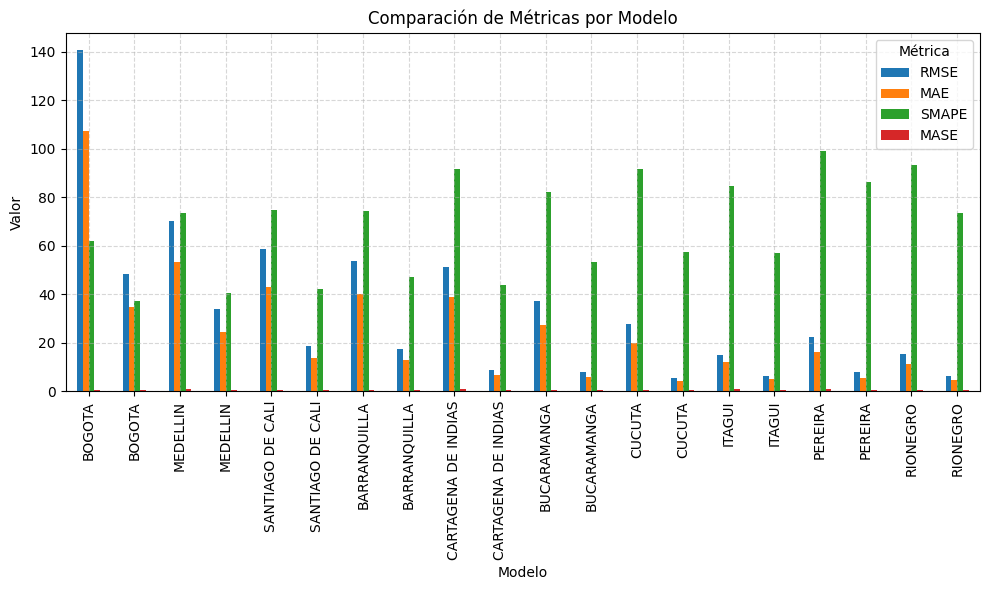

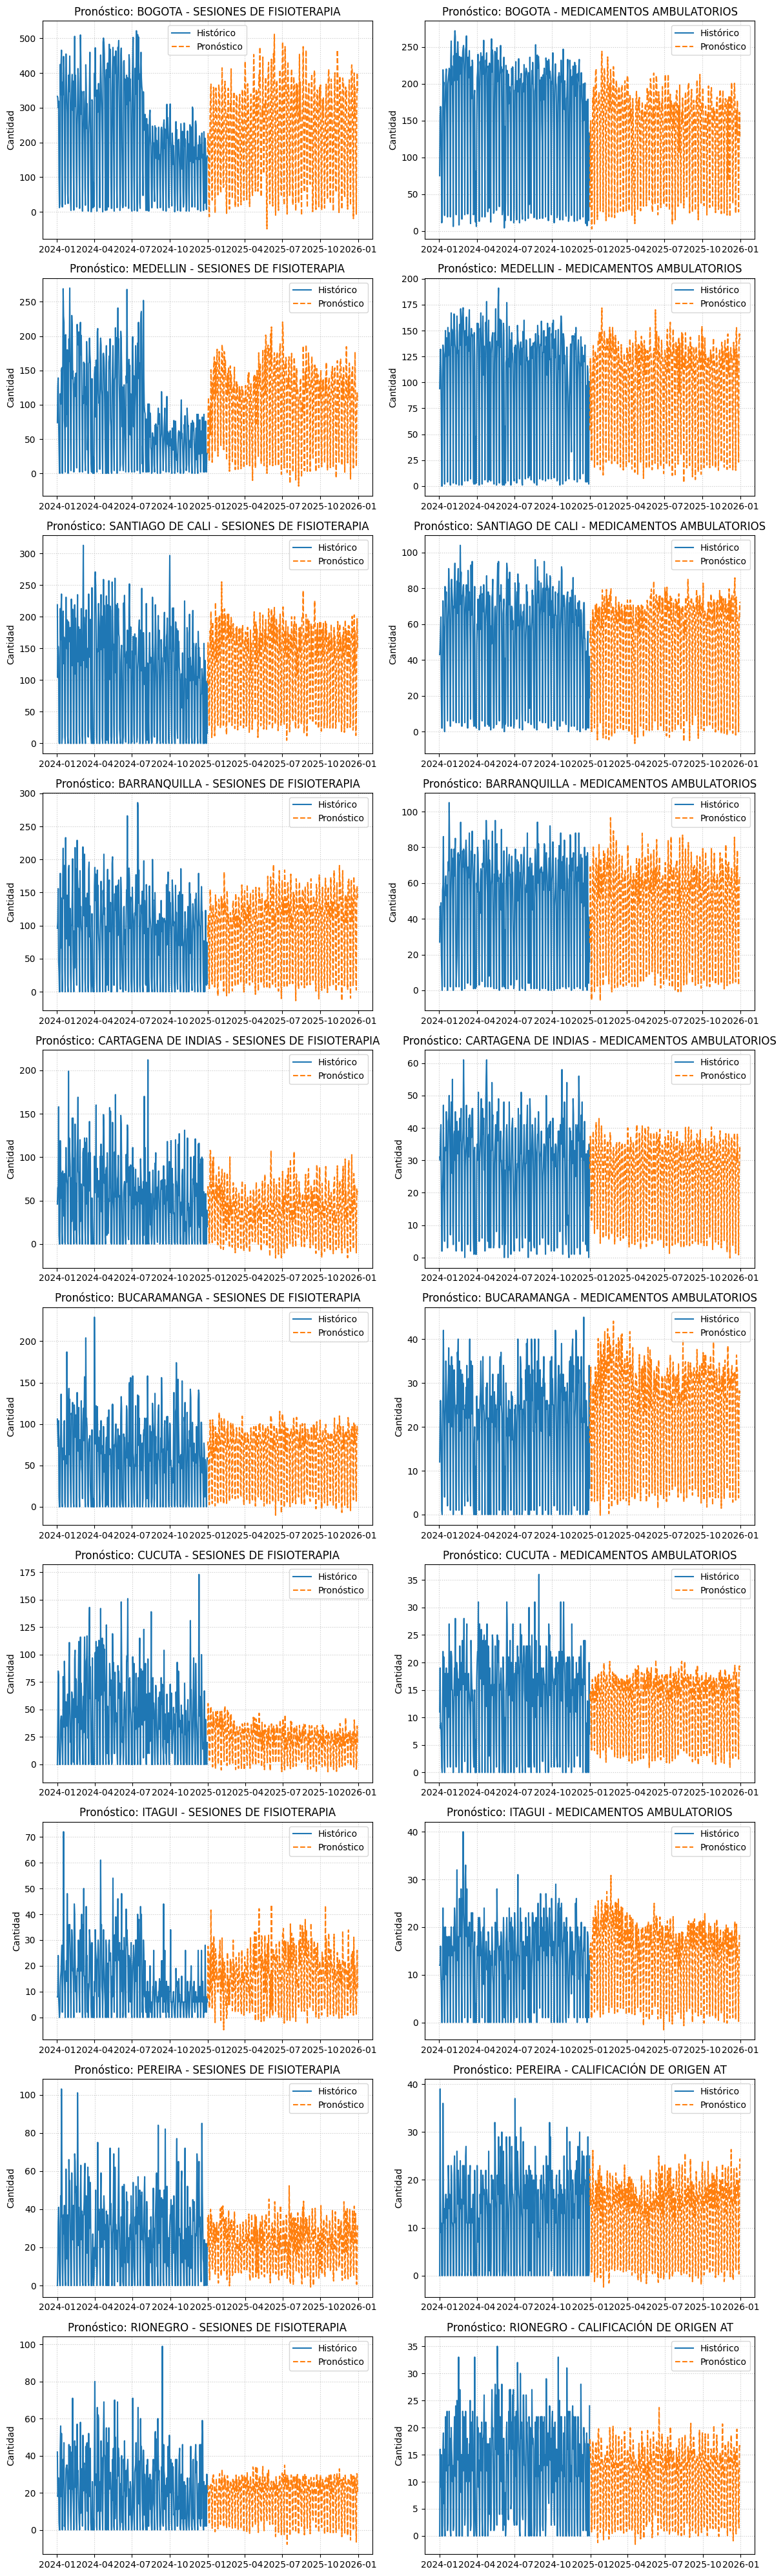

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import holidays

# ------------------------- Configuración -------------------------------
GPUS = tf.config.list_physical_devices('GPU')
if GPUS:
    for g in GPUS:
        tf.config.experimental.set_memory_growth(g, False)
    print(f"GPUs detectadas: {len(GPUS)}")
else:
    print("Usando CPU")

WINDOW = 60
#TOP_N = 10
#TOP_M = 2
CV_SPLITS = 5
HORIZON = 365  # días a predecir

# ------------------------- Métricas extendidas ---------------------------
def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denom != 0
    return 100 * np.mean(np.abs(y_true[mask] - y_pred[mask]) / denom[mask])

def mase(y_true, y_pred, y_insample, season=1):
    mae_model = mean_absolute_error(y_true, y_pred)
    diff = np.abs(y_insample[season:] - y_insample[:-season])
    mae_naive = diff.mean()
    return mae_model / mae_naive if mae_naive != 0 else np.nan

# ------------------------- Data Prep ---------------------------------------
def load_data(path):
    df = pd.read_csv(path, sep='|', usecols=['FECHA_ATENCION','Concepto_Factura_Desc','Cantidad','MUNICIPIO'],
                     parse_dates=['FECHA_ATENCION'])
    df.drop_duplicates(inplace=True)
    df = df[df['Cantidad'].notna()]
    df['MUNICIPIO'] = df['MUNICIPIO'].str.split('-').str[0].str.strip()
    return df

# Exógenas
cal = holidays.Colombia()

def make_exog(idx):
    df_ex = pd.DataFrame(index=idx)
    df_ex['is_weekend'] = (idx.dayofweek >= 5).astype(int)
    df_ex['is_holiday'] = idx.to_series().apply(lambda d: 1 if d in cal else 0)
    df_ex['covid'] = idx.to_series().apply(lambda d: 1 if (d.year==2020 and d.month>=3) or d.year==2021 else 0)
    return df_ex

# Serie diaria univariante + exógenas
def get_ts_exog(df, muni, serv):
    ts = df[(df['MUNICIPIO']==muni)&(df['Concepto_Factura_Desc']==serv)]
    ts = ts.set_index('FECHA_ATENCION')['Cantidad'].resample('D').sum().asfreq('D').fillna(0)
    ex = make_exog(ts.index)
    return ts, ex

# Secuencias para DL con exógenas

def make_seq_exog(target, exog, w, scaler_t=None, scaler_ex=None):
    if scaler_t is None:
        scaler_t = StandardScaler()
        target_scaled = scaler_t.fit_transform(target.values.reshape(-1,1))[:,0]
    else:
        target_scaled = scaler_t.transform(target.values.reshape(-1,1))[:,0]
    if scaler_ex is None:
        scaler_ex = StandardScaler()
        exog_scaled = scaler_ex.fit_transform(exog)
    else:
        exog_scaled = scaler_ex.transform(exog)
    
    X, y = [], []
    for i in range(len(target_scaled) - w):
        xi = np.concatenate([
            target_scaled[i:i+w].reshape(-1,1),
            exog_scaled[i:i+w]
        ], axis=1)
        X.append(xi)
        y.append(target_scaled[i+w])
    return np.array(X), np.array(y), scaler_t, scaler_ex

# ------------------------- Train/Evaluate CV -------------------------------
def train_evaluate(ts, exog, params):
    cv = TimeSeriesSplit(n_splits=CV_SPLITS)
    results = []
    insample = ts.values

    for train_idx, test_idx in cv.split(ts):
        tr_ts, te_ts = ts.iloc[train_idx], ts.iloc[test_idx]
        tr_ex, te_ex = exog.iloc[train_idx], exog.iloc[test_idx]
        if len(tr_ts) < WINDOW+1 or len(te_ts)==0: continue

        Xtr, Ytr, sc_t, sc_ex = make_seq_exog(tr_ts, tr_ex.values, WINDOW)
        Xte, _, _, _ = make_seq_exog(
            pd.concat([tr_ts.tail(WINDOW), te_ts]),
            np.vstack([tr_ex.tail(WINDOW), te_ex]),
            WINDOW, sc_t, sc_ex)

        n_feat = Xtr.shape[2]
        inp = layers.Input((WINDOW, n_feat))
        res, fc = inp, 0

        class Block(layers.Layer):
            def __init__(self):
                super().__init__()
                self.hidden = [layers.Dense(params['units'], activation='relu') for _ in range(4)]
                self.backcast = layers.Dense(WINDOW * n_feat)
                self.forecast = layers.Dense(1)

            def call(self, x):
                h = layers.Flatten()(x)
                for lyr in self.hidden: h = lyr(h)
                b = self.backcast(h)
                f = self.forecast(h)
                return tf.reshape(b, (-1, WINDOW, n_feat)), f

        for _ in range(params['stacks']): b, f = Block()(res); res = res - b; fc = f if isinstance(fc,int) else fc+f
        model = models.Model(inp, fc)
        model.compile('adam', 'mse')
        model.fit(Xtr, Ytr, epochs=params['epochs'], batch_size=32,
                  validation_split=0.1, verbose=0,
                  callbacks=[callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

        preds_s = model.predict(Xte, verbose=0).flatten()[-len(te_ts):]
        preds = sc_t.inverse_transform(preds_s.reshape(-1,1)).flatten()
        true = te_ts.values

        results.append({
            'RMSE': mean_squared_error(true, preds, squared=False),
            'MAE': mean_absolute_error(true, preds),
            'SMAPE': smape(true, preds),
            'MASE': mase(true, preds, insample)
        })

    return pd.DataFrame(results).mean() if results else pd.Series({k: np.nan for k in ['RMSE','MAE','SMAPE','MASE']})

def retrain_and_forecast(ts, exog, params, horizon=HORIZON):
    dates = pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=horizon, freq='D')
    full_exog = make_exog(ts.index.append(dates))

    # Crear secuencias completas
    X, Y, sc_t, sc_ex = make_seq_exog(ts, exog.values, WINDOW)
    n_feat = X.shape[2]

    # Definir modelo
    inp = layers.Input(shape=(WINDOW, n_feat))
    res, fc = inp, 0
    class Block(layers.Layer):
        def __init__(self):
            super().__init__(); self.hidden=[layers.Dense(params['units'],activation='relu') for _ in range(4)];
            self.backcast=layers.Dense(WINDOW*n_feat); self.forecast=layers.Dense(1)
        def call(self,x):
            h=layers.Flatten()(x)
            for lyr in self.hidden: h=lyr(h)
            b=self.backcast(h); f=self.forecast(h)
            return tf.reshape(b,(-1,WINDOW,n_feat)), f
    for _ in range(params['stacks']): b,f=Block()(res); res=res-b; fc = f if isinstance(fc,int) else fc+f
    model = models.Model(inp, fc); model.compile('adam','mse')
    model.fit(X, Y, epochs=params['epochs'], batch_size=32,
              validation_split=0.1, verbose=0,
              callbacks=[callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

    history = ts.values.tolist()
    preds = []
    for i in range(horizon):
        ex_win = full_exog.iloc[len(history)-WINDOW:len(history)].values
        x_input = np.concatenate([
            sc_t.transform(np.array(history[-WINDOW:]).reshape(-1,1)),
            sc_ex.transform(ex_win)
        ], axis=1)
        x_input = x_input.reshape(1, WINDOW, n_feat)
        y_s = model.predict(x_input, verbose=0).flatten()[0]
        y = sc_t.inverse_transform([[y_s]])[0,0]
        preds.append(y); history.append(y)
    return pd.Series(preds, index=dates)

# ------------------------- Visualización Mejorada -------------------------------
def plot_metrics(summary_list):
    df = pd.DataFrame(summary_list).set_index('model')
    fig, ax = plt.subplots(figsize=(10,6))
    df[['RMSE','MAE','SMAPE','MASE']].plot(kind='bar', ax=ax)
    ax.set_title('Comparación de Métricas por Modelo')
    ax.set_xlabel('Modelo')
    ax.set_ylabel('Valor')
    ax.legend(title='Métrica')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def plot_forecasts(ts_list, fc_list, names):
    n = len(ts_list)
    cols = 2
    rows = (n + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows), sharex=False)
    axes = axes.flatten()

    for i, (ts, fc, name) in enumerate(zip(ts_list, fc_list, names)):
        ax = axes[i]
        ax.plot(ts[-365:], label='Histórico')
        ax.plot(fc, label='Pronóstico', linestyle='--')
        ax.set_title(f'Pronóstico: {name}')
        ax.set_ylabel('Cantidad')
        ax.legend()
        ax.grid(True, linestyle=':', alpha=0.7)

    # Eliminar ejes vacíos
    for j in range(i+1, len(axes)): fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

# ------------------------- Ejemplo de Uso -------------------------------
TOP_N = 10
TOP_M = 2
df = load_data('/kaggle/input/data-sura/1.Informacion Salud 2019-2024-001.txt')

top_munis = df.groupby('MUNICIPIO')['Cantidad'].sum().nlargest(TOP_N).index
combos = [(m, s) for m in top_munis for s in df[df['MUNICIPIO']==m]
          .groupby('Concepto_Factura_Desc')['Cantidad'].sum().nlargest(TOP_M).index]
print(f"Procesando {len(combos)} combos")
#combos = [('BOGOTA','MEDICAMENTOS AMBULATORIOS')]  # lista de (municipio, servicio)
summary = []
ts_list, fc_list, names = [], [], []
best_params = {'epochs':20,'stacks':3,'units':128}
for m, s in combos:
    ts, ex = get_ts_exog(df, m, s)
    summary.append({**train_evaluate(ts, ex, best_params), 'model': m})
    fc = retrain_and_forecast(ts, ex, best_params)
    ts_list.append(ts); fc_list.append(fc); names.append(f"{m} - {s}")
plot_metrics(summary)
plot_forecasts(ts_list, fc_list, names)


In [21]:
print(summary)

[{'RMSE': 144.99439784485855, 'MAE': 111.27542817315009, 'SMAPE': 61.59102205977988, 'MASE': 0.6706436827164474, 'model': 'BOGOTA'}]


## *-===========================-***